# Decision Tree
## Name: Nguyen Anh Hoang Phuc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
    
    def _gini(self, X):
        """
        Calculating Gini Impurity
        Parameters
        =========
        x: ndarray, shape (n_samples,) of the following form
           Features value of training data
        """
        unique, count = np.unique(X, return_counts=True)
        tmp = 0

        for i in unique:
            tmp += (count[unique==i]/np.sum(count))**2

        return 1-tmp

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        feature_num = X.shape[1]

        self.gain = 0
        for i in range(feature_num):
            self.threshold = np.unique(X[:,i])
            for j in self.threshold[1:]:
                l = y[X[:,i] < j]
                r = y[X[:,i] >= j]

                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)

                tmp = self._gini(y) - gini_l - gini_r

                if tmp > self.gain:
                    self.l_label = statistics.mode(l)
                    self.r_label = statistics.mode(r)
                    self.feature = i
                    self.threshold = j
                    self.gain = tmp

                    if self.verbose:
                        print('feature', self.feature,
                              'threshold',self.threshold,
                              'gain', self.gain)


    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        return np.where(X[:,self.feature] < self.threshold, self.l_label, self.r_label)

In [3]:
# Visualizing the decision area
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,title='decision region',xlabel1='xlabel',ylabel1='ylabel',target_names=['versicolor','virginica']):
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    #pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    #plot
    plt.title(title)
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.contourf(mesh_f0,mesh_f1,y_pred,n_class-1,cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0,mesh_f1,y_pred,n_class-1,colors='y', linewidths=5,alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1],s=80,color=scatter_color[i],label=target_names[i],marker='o')
    patches = [mpatches.Patch(color=scatter_color[i],label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

### Find the conditions for division by learning

By learning, we ask under what conditions the nodes can be divided well.

Calculate the Gini Impureness and Information Gain values for the node to determine if it is well separated.



## Problem 1 Function for finding impureness

Create a function to calculate the Gini impurity​​ ​of a node. For node t
, the Gini impurity I(t) can be obtained by the following formula The more mixed the classes are, the higher the Gini impurity.

$I(t)=1-\sum_{i=1}^{K} P^{2}\left(C_{i} \mid t\right)=1-\sum_{i=1}^{K}\left(\frac{N_{t, i}}{N_{t, a l l}}\right)^{2}$

$t$: Index of nodes

$i$: Index of classes

$K$: Number of classes

$C_i$: The i-th class

%P(C_i|t)$:　Proportion of Ci

at the t-th node

$N_{t, i}$: Number of samples belonging to the i-th class of the t-th node

$N_{t, all}$: Total number of samples at the t-th node

First, make a simple example and compare the results of the manual calculation with the function.

<< Example >>

    Class 1: Number of samples 15, Class 2: Number of samples 15 → Gini impure 0.500
    Class 1: Number of samples 15, Class 2: Number of samples 15, Class 3: Number of samples 15 → Gini impure 0.667
    Class 1: Number of samples 18, Class 2: Number of samples 12 → Gini impure 0.480
    Class 1: Number of samples 30, Class 2: Number of samples 0 → Gini impure 0.000


In [4]:
# Check with test data 

X = np.array([0,2,1,-1,4])
y = np.array([0,0,0,1,1])

In [5]:
threshold_value = np.unique(X)
print('threshole_value', threshold_value)

threshole_value [-1  0  1  2  4]


In [6]:
# Classify by label value
u,counts = np.unique(y,return_counts=True)
print('unique',u,'unique_counts',counts)

unique [0 1] unique_counts [3 2]


In [7]:
def _gini(x):
        unique, count = np.unique(x, return_counts=True)
        tmp = 0

        for i in unique:
            tmp += (count[unique==i]/np.sum(count))**2

        return 1-tmp

In [8]:
# Calculating of Gini impurty at each threshhold
for i in threshold_value[1:]:
    c1 = y[X < i]
    c2 = y[X >= i]

    print(i,'c1',c1,'c2',c2)
    print(i,'gini_left:',_gini(c1),'gini_right',_gini(c2))

0 c1 [1] c2 [0 0 0 1]
0 gini_left: [0.] gini_right [0.375]
1 c1 [0 1] c2 [0 0 1]
1 gini_left: [0.5] gini_right [0.44444444]
2 c1 [0 0 1] c2 [0 1]
2 gini_left: [0.44444444] gini_right [0.5]
4 c1 [0 0 0 1] c2 [1]
4 gini_left: [0.375] gini_right [0.]


## Problem 2 Function for finding information gain
Next, create a function to calculate theinformation gain between the nodes. Gini Impurity $I(t)$ (t)​ created in Problem 1.The better the separation, the greater the information gain.

Since there are only two branches here, the branch destination is called the "left node / right node".

$I G(p)=I(p)-\frac{N_{l e f t, a l l}}{N_{p, a l l}} I($ left $)-\frac{N_{\text {right }, \text { all }}}{N_{p, a l l}} I($ right $)$

$p$: Index indicating the parent node

$left$: Index showing the left-hand node

$right$: Index showing the nodes on the right

First, make a simple example and compare the results of the manual calculation with the function.

<< Example >>

Left node class 1: Number of samples 10, Left node class 2: Number of samples 30, Right node class 1: Number of samples 20, Right node class 2: Number of samples 5 → Information gain 0.143

In [9]:
for j in threshold_value[1:]:
    c1 = y[X < j]
    c2 = y[X >= j]

    left = len(c1)/(len(c1)+len(c2))*_gini(c1)
    right = len(c2)/(len(c1)+len(c2))*_gini(c2)

    gain = _gini(X) - left - right 
    print(i, gain)

4 [0.5]
4 [0.33333333]
4 [0.33333333]
4 [0.5]


## Problem 3 Learning

Write the code to split the space and generate a graph of the decision tree. Since it is a decision tree with a depth of 1, we will divide it only once. Generating a graph here means finding which feature quantity is more than how many as a condition for one division.

All combinations of training data are divided, and the division that maximizes the information gain between nodes is recorded as the division criterion for that node.

A node with zero impureness that does not mix classes, or a node with a specified depth is a leaf node. A class is recorded in the leaf node, and this is used as the class to be classified at the time of estimation. If the classes are not mixed, record the class as it is, and if it is mixed, decide by majority vote.

<< How to take a combination >>

The simplest way to take all combinations is to use the value of each feature as a threshold value for division. Use this method for this scratch on one end.

Another method is to set an intermediate value as the threshold, and scikit-learn uses this method.

<< Supplement >>

The function for calculating the information gain in Problem 2 is not suitable for use in Problem 3, as it is not possible to calculate the impurity of the parent node I(p)

is fixed, the same result can be obtained by simply summing the impurity of the left and right nodes. However, here the implementation should take into account the parent node and calculate the information gain.

In [10]:
# sameple data 2
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

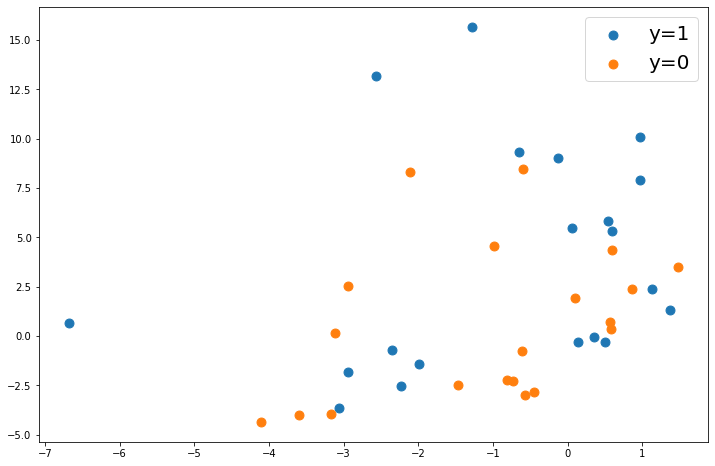

In [11]:
# Visualizing simple Data 2
fit,ax = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[y==1,0],X[y==1,1],s=80, label='y=1')
plt.scatter(X[y==0,0],X[y==0,1],s=80, label='y=0')
plt.legend()

In [12]:
# Split into training data and validation
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=None)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_valid.shape: ', X_valid.shape)
print('y_valid.shape: ', y_valid.shape)

X_train.shape:  (32, 2)
y_train.shape:  (32,)
X_valid.shape:  (8, 2)
y_valid.shape:  (8,)


In [13]:
# Visualizing the Learning Process with Scratch Decision Trees
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf1.fit(X_train, y_train)

feature 0 threshold -4.1013 gain [0.01820817]
feature 0 threshold -3.0603 gain [0.02675058]
feature 0 threshold -0.44699 gain [0.02942339]
feature 0 threshold -0.12243 gain [0.04700521]
feature 1 threshold -2.2135 gain [0.04756378]
feature 1 threshold -1.8219 gain [0.06566051]


## Problem 4 Estimate

Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchDecesionTreeClassifierDepth1 class.

Judge the value of the input data under the learned conditions and see which leaf node is reached. Since the class is recorded in the leaf node, this is the estimate.

In [14]:
y_pred = clf1.predict(X_valid)

In [15]:
print(y_pred)
print(y_valid)

[1 1 1 1 1 1 1 1]
[1 0 1 1 0 1 1 0]


## Problem 5 Learning and estimation

Learn and estimate the scratch implementation for the binary classification of Simple Dataset 2 prepared in Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [16]:
# Evaluation index 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  0.625
precision:  0.625
recall:  1.0
f1:  0.7692307692307693


In [17]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=1)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_valid)

In [18]:
print(y_pred)
print(y_valid)

[1 1 1 1 1 1 1 1]
[1 0 1 1 0 1 1 0]


In [19]:
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  0.625
precision:  0.625
recall:  1.0
f1:  0.7692307692307693


<li> The prediction results of the scratch implementation and the sklearn prediction at depth 1 are the same
<li> Next, let's visualize the decision region and compare it with the threshold of sklearn

## Problem 6 Visualization of decision area

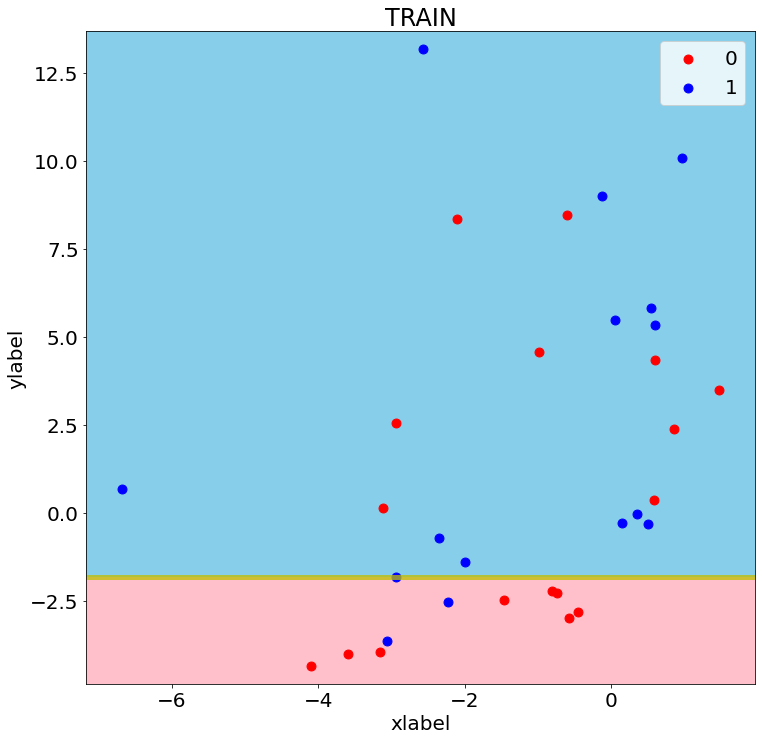

In [20]:
# Results of Scratch Decision Tree Classification
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf1,title='TRAIN',target_names=['0','1'])

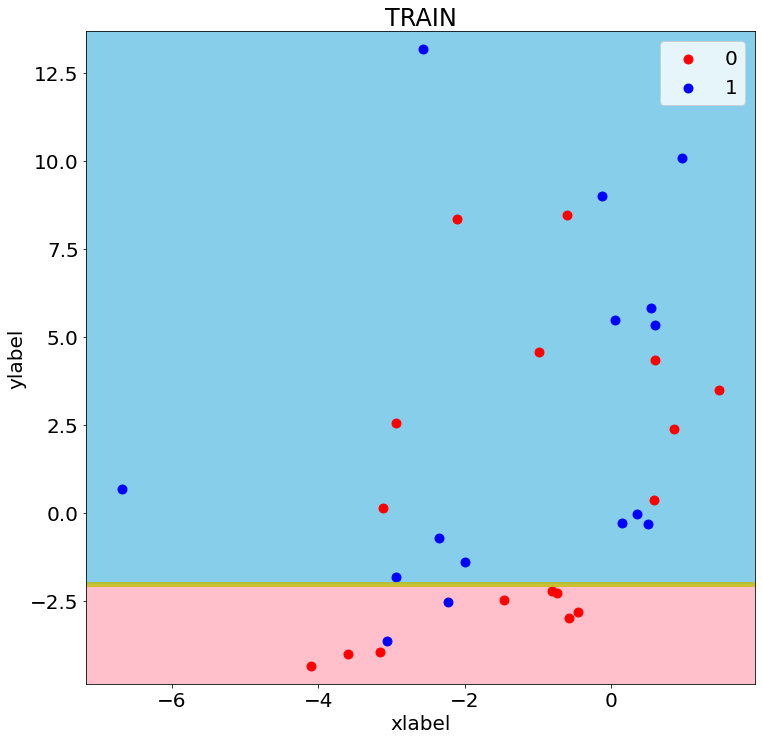

In [21]:
# Decision Tree Classification results for scikit-learn
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf2,title='TRAIN',target_names=['0','1'])

## Problem 7 (Advance assignment) Creation of a decision tree classifier class with a depth of 2

Create a decision tree classifier class ScratchDecesionTreeClassifierDepth2 with a depth of 2.

Depth 2 means that the space is divided twice.

《Hint》

Treating each node as an instance makes it easier to extend to any depth

In [22]:
# Regeneration of training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=None)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_valid.shape: ', X_valid.shape)
print('y_valid.shape: ', y_valid.shape)

X_train.shape:  (32, 2)
y_train.shape:  (32,)
X_valid.shape:  (8, 2)
y_valid.shape:  (8,)


<li> Create a node class to hold and track variables for each node at arbitrary depths

In [23]:
# Node class
class Node():
    """
    A class that composes and separates the nodes of decision tree
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    max_depthL int
      Maximum training depth of decision tree
    """
    def __init__(self,max_depth=None, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
        self.feature = None
    
    def _separate(self, X, y, depth):
        """
        Split nodes using the CART method
        Parameters
        ==========
        x: ndarray, shape (n_samples,) of the following form
            Label value of training data
        """
        self.depth = depth 
        features = X.shape[1]

        # After branching, if Gini purity is 0, branching ends
        if len(np.unique(y)) == 1:
            self.label = np.unique(y)[0]
            return 
        
        # Branch ends if maximum depth is reached
        if self.depth == self.max_depth:
            self.label = statistics.mode(y)
            return 
        
        self.gain = 0
        for feature_number in range(features):

            thresholds = np.unique(X[:,feature_number])

            for threshold_value in thresholds[1:]:
                l = y[X[:,feature_number] < threshold_value]
                r = y[X[:,feature_number] >= threshold_value]

                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)

                gain_tmp = self._gini(y) - gini_l - gini_r 

                if gain_tmp > self.gain:
                    self.feature = feature_number
                    self.threshold = threshold_value
                    self.gain = gain_tmp

        if self.verbose:
            print('depth', self.depth,
                'feature', self.feature,
                'threshold',self.threshold,
                'gain', self.gain)
        
        # Branch of child node (left)
        l_X = X[X[:,self.feature] < self.threshold]
        l_y = y[X[:,self.feature] < self.threshold]
        self.left = Node(self.max_depth, self.verbose)
        self.left._separate(l_X, l_y, depth+1)

        # Branch of child node (right)
        r_X = X[X[:,self.feature] >= self.threshold]
        r_y = y[X[:,self.feature] >= self.threshold]
        self.right = Node(self.max_depth, self.verbose)
        self.right._separate(r_X, r_y, depth+1)
    
    def _gini(self, X):
        """
        Calculating Gini Impurity
        Parameters
        =========
        x: ndarray, shape (n_samples,) of the following form
           Features value of training data
        """
        unique, count = np.unique(X, return_counts=True)
        tmp = 0

        for i in unique:
            tmp += (count[unique==i]/np.sum(count))**2

        return 1-tmp

    def _predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.feature == None or self.depth == self.max_depth:
            return self.label
        
        else:
            if X[self.feature] < self.threshold:
                return self.left._predict(X)
            else:
                return self.right._predict(X)

In [24]:
class ScratchDecesionTreeClassifierDepth():
    """
    Scratch implementation of decision tree classifier of depth n
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    max_depth: int
      Maximum training depth of decision tree
    """
    def __init__(self, max_depth=1, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.depth = 0
        self.root = Node(self.max_depth, self.verbose)
        self.root._separate(X,y,self.depth)


    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        y_pred = np.zeros(len(X))

        for i,x in enumerate(X):
            y_pred[i] = self.root._predict(x)
        return y_pred

In [25]:
# Learning Depth 2 with Scratch Decision Trees
clf3 = ScratchDecesionTreeClassifierDepth(max_depth=2, verbose=True)
clf3.fit(X_train,y_train)

depth 0 feature 1 threshold 5.3524 gain [0.09375]
depth 1 feature 1 threshold -3.6461 gain [0.04017857]
depth 1 feature 1 threshold 9.0162 gain [0.05208333]


In [26]:
y_pred3 = clf3.predict(X_valid)
print(y_pred3)

[0. 0. 1. 0. 0. 1. 1. 0.]


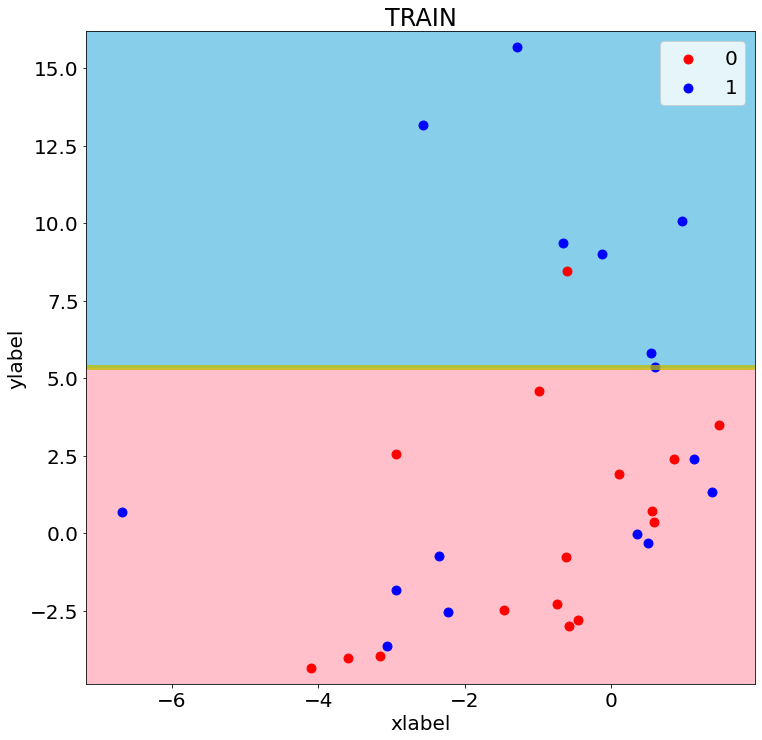

In [27]:
# Decision region of the Scratch decision Tree (depth 2)
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf3,title='TRAIN',target_names=['0','1'])

## Problem 8 (Advance assignment) Creation of decision tree classifier class with unlimited depth

Create a decision tree classifier class ScratchDecesionTreeClassifierDepthInf with unlimited depth.

Allow any depth to be specified, otherwise allow all leaf nodes to continue until all Gini impureness is zero.

In [28]:
# Learning the Scratch Decision Tree (depth n)
clf5 = ScratchDecesionTreeClassifierDepth(max_depth=None,verbose=True)
clf5.fit(X_train,y_train)

depth 0 feature 1 threshold 5.3524 gain [0.09375]
depth 1 feature 1 threshold -3.6461 gain [0.04017857]
depth 2 feature 0 threshold -1.4621 gain [0.13106576]
depth 3 feature 1 threshold 2.5462 gain [0.27777778]
depth 3 feature 0 threshold 0.35084 gain [0.12444444]
depth 4 feature 0 threshold 0.56421 gain [0.16666667]
depth 5 feature 0 threshold 1.1319 gain [0.22222222]
depth 6 feature 0 threshold 1.4771 gain [0.44444444]
depth 1 feature 1 threshold 9.0162 gain [0.05208333]
depth 2 feature 0 threshold 0.5461 gain [0.44444444]


In [29]:
y_pred5 = clf5.predict(X_valid)
print(y_pred5)

[0. 0. 0. 1. 1. 0. 1. 0.]


In [30]:
accuracy = accuracy_score(y_valid, y_pred5)
precision = precision_score(y_valid, y_pred5)
recall = recall_score(y_valid, y_pred5)
f1 = f1_score(y_valid, y_pred5)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

accuracy:  0.625
precision:  0.6666666666666666
recall:  0.5
f1:  0.5714285714285715


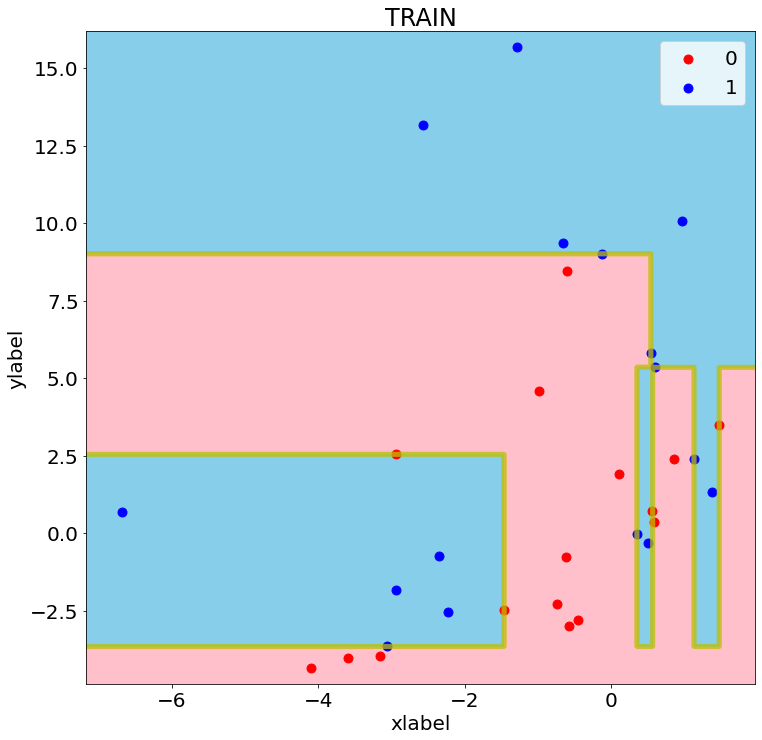

In [31]:
# Decision region of the Scratch decision Tree (depth n)
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf5,title='TRAIN',target_names=['0','1'])

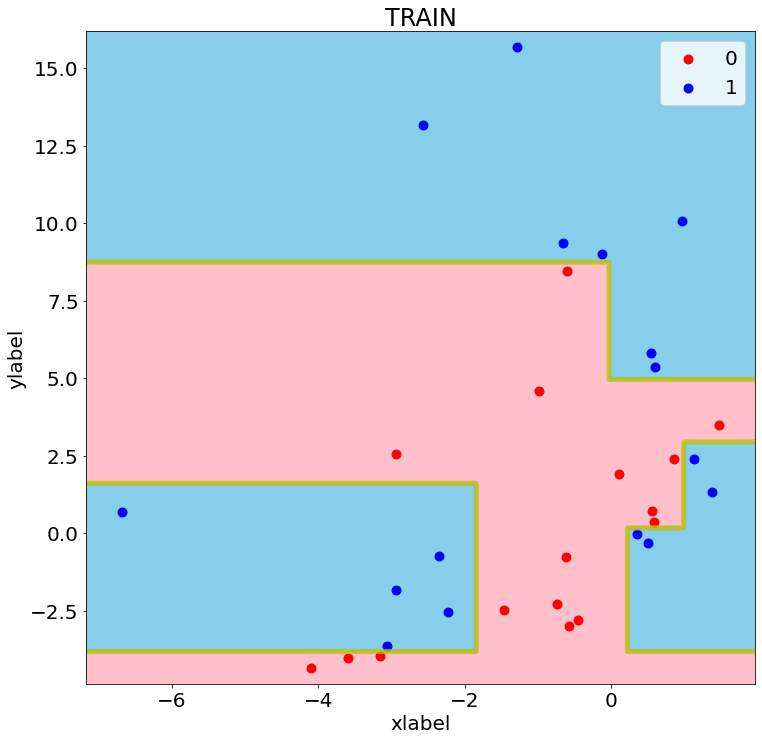

In [32]:
# Decision region of Sklearn decision Tree (depth n)
clf_sk = DecisionTreeClassifier(max_depth=None,random_state=None)
clf_sk.fit(X_train,y_train)

fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf_sk,title='TRAIN',target_names=['0','1'])